### Business Problem: Enhancing Personalization to Improve Listener Retention

### Background:

Spotify offers an extensive collection of tracks, and while this variety is a strength, there's a need to curate playlists more effectively to maintain and enhance user engagement and retention.

### The Problem:

Although Spotify's library is diverse, there is evidence of user engagement stagnating. Users seem to be seeking more personalized playlist experiences that reflect their preferences. The current challenge is to use Spotify's dataset to curate playlists that better match user tastes, which could be crucial in improving engagement and reducing churn.

### Objective:

To refine playlist curation using data-driven insights into the popularity and distribution of audio features and genres/subgenres across Spotify's music library.

### To solve the problem, the key questions we should be asking are:

1. Which genres and subgenres have the highest representation in the dataset, and how does this reflect in user engagement and track popularity?

2. What are the common audio feature profiles of the most popular tracks within these genres and subgenres?

3. How does the diversity of genres and subgenres within playlists relate to track popularity?

### Expected Outcomes:

1. **Enhanced Curation:** Curated playlists that better reflect the distribution and popularity of genres and subgenres represented in Spotify's dataset.

2. **Strategic Diversity:** Strategies that consider the relationship between genre/subgenre diversity within playlists and track popularity to potentially improve user engagement.

3. **Data-Driven Personalization:** Utilizing the understanding of popular audio feature profiles to create playlists that align more closely with the prevalent listener preferences.

### Data Overview

To be written later

### Importing libraries & reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Read the data from Kaggle
df = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv")

### Initial Data Exploration

In [3]:
# Check the shape of the data frame
print(df.shape)

(32833, 23)


In [4]:
# Display the first few rows
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [5]:
# Summary statistics for numerical columns
print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

In [6]:
# Checking the data types
print(df.dtypes)

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


In [7]:
# Checking for missing values
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [8]:
# Checking for duplicates
print(df.duplicated().sum())

0


### Data Cleaning 

In [9]:
# Remove rows with missing values in 'track_name', 'track_artist', 'track_album_name'
df_cleaned = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Check remaining missing values
print(df_cleaned.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [10]:
# Convert 'track_album_release_date' to datetime, handling different formats
# (Explain why loc was used)
df_cleaned.loc[:, 'track_album_release_date'] = pd.to_datetime(df_cleaned['track_album_release_date'], errors='coerce', exact=False)

# Count 'NaT' values in the track_album_release_date column
nat_counts = df_cleaned['track_album_release_date'].isna().sum()
print(f"Number of 'NaT' values: {nat_counts}")

Number of 'NaT' values: 1886


In [11]:
# Drop rows where track_album_release_date is 'NaT'
df_cleaned = df_cleaned.dropna(subset=['track_album_release_date'])

# Verify the conversion
print(df_cleaned['track_album_release_date'].head())

0    2019-06-14 00:00:00
1    2019-12-13 00:00:00
2    2019-07-05 00:00:00
3    2019-07-19 00:00:00
4    2019-03-05 00:00:00
Name: track_album_release_date, dtype: object


In [12]:
# Check the shape of the cleaned DataFrame
print(df_cleaned.shape)

(30942, 23)


### Exploratory Data Analysis (EDA)

#### 1. Distribution of Track Popularity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


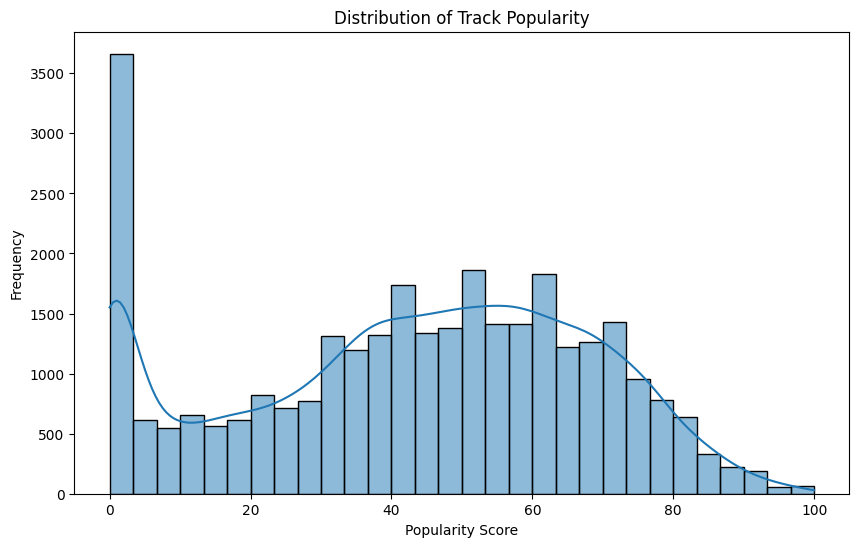

In [13]:
# Histogram of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

The histogram shows a skewed distribution with a peak in the lower popularity scores, indicating that most tracks have lower popularity scores.
There's a long tail stretching towards the higher popularity scores, but these are less frequent.

In [14]:
# Central Tendency and Dispersion
mean_popularity = df['track_popularity'].mean()
median_popularity = df['track_popularity'].median()
std_popularity = df['track_popularity'].std()
print(f"Mean Popularity: {mean_popularity}")
print(f"Median Popularity: {median_popularity}")
print(f"Standard Deviation of Popularity: {std_popularity}")

Mean Popularity: 42.477080985593766
Median Popularity: 45.0
Standard Deviation of Popularity: 24.984074486186937


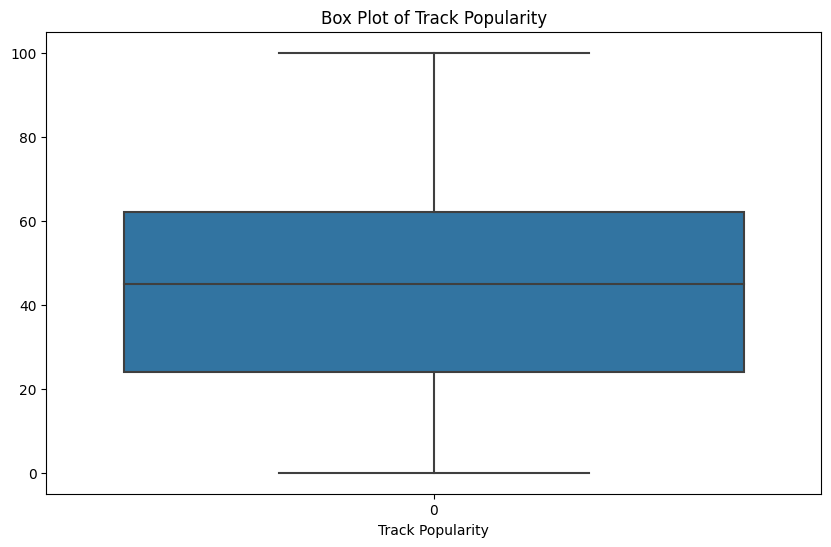

In [15]:
# Box Plot for Popularity
plt.figure(figsize=(10, 6))
sns.boxplot(df['track_popularity'])
plt.title('Box Plot of Track Popularity')
plt.xlabel('Track Popularity')
plt.show()

The box plot indicates that the median track popularity is around the 40-50 range.
There are some outliers, which are tracks with exceptionally high popularity scores.

/tmp/ipykernel_33/2038277217.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='playlist_genre', y='track_popularity', data=df_cleaned, ci=None, palette='coolwarm')


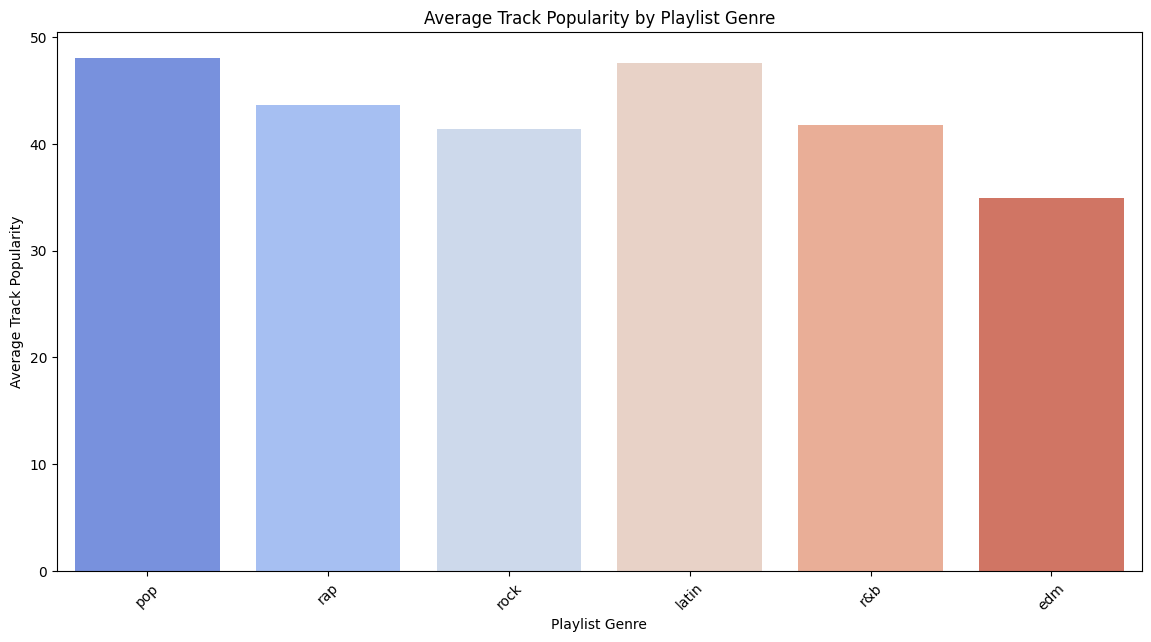

In [16]:
# Popularity by Genre (assuming 'genre' is a column in the dataset)
plt.figure(figsize=(14, 7))
sns.barplot(x='playlist_genre', y='track_popularity', data=df_cleaned, ci=None, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Track Popularity by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Track Popularity')
plt.show()

This bar chart compares the average popularity of tracks across different playlist genres.
All genres seem to have a relatively similar average popularity, with none standing out as significantly more popular on average than the others.

/tmp/ipykernel_33/1518974213.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='playlist_subgenre', y='track_popularity', data=df_cleaned, ci=None, palette='coolwarm')


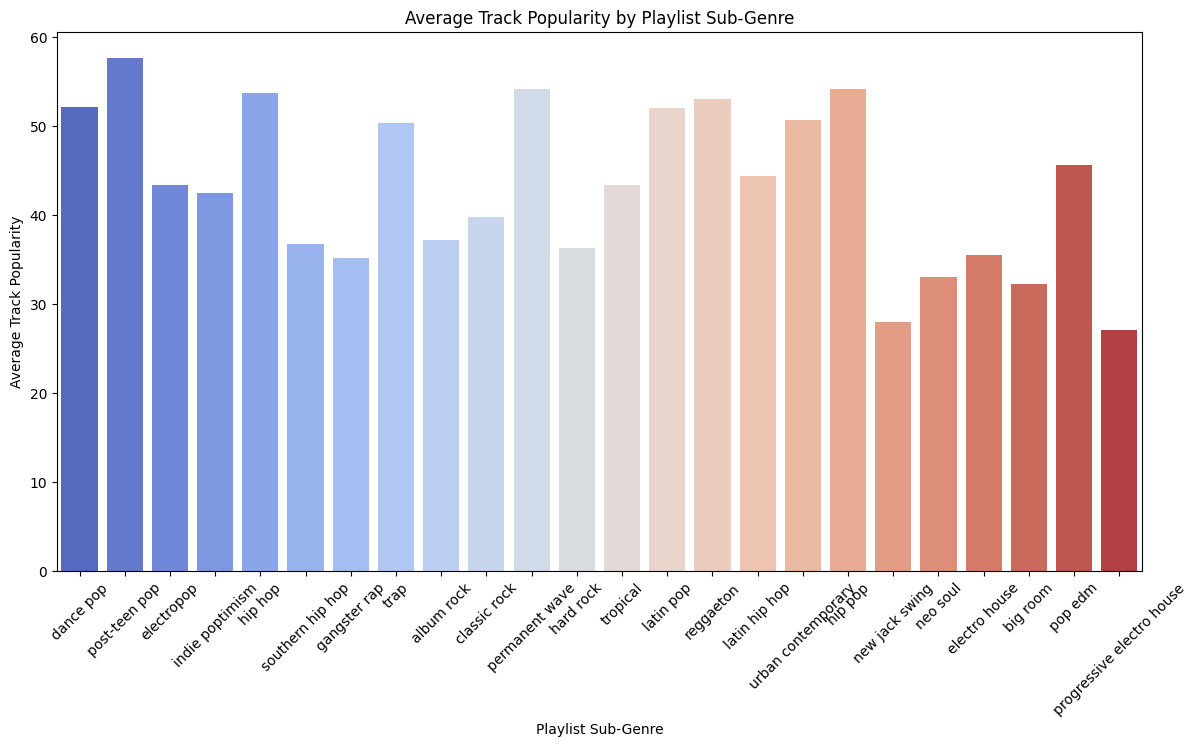

In [17]:
# Popularity by Genre (assuming 'genre' is a column in the dataset)
plt.figure(figsize=(14, 7))
sns.barplot(x='playlist_subgenre', y='track_popularity', data=df_cleaned, ci=None, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Track Popularity by Playlist Sub-Genre')
plt.xlabel('Playlist Sub-Genre')
plt.ylabel('Average Track Popularity')
plt.show()

Similar to the playlist genre chart, this one gives a more granular view of the average popularity within sub-genres.
There is more variability in average popularity across sub-genres, with some sub-genres having higher average popularity scores than others.

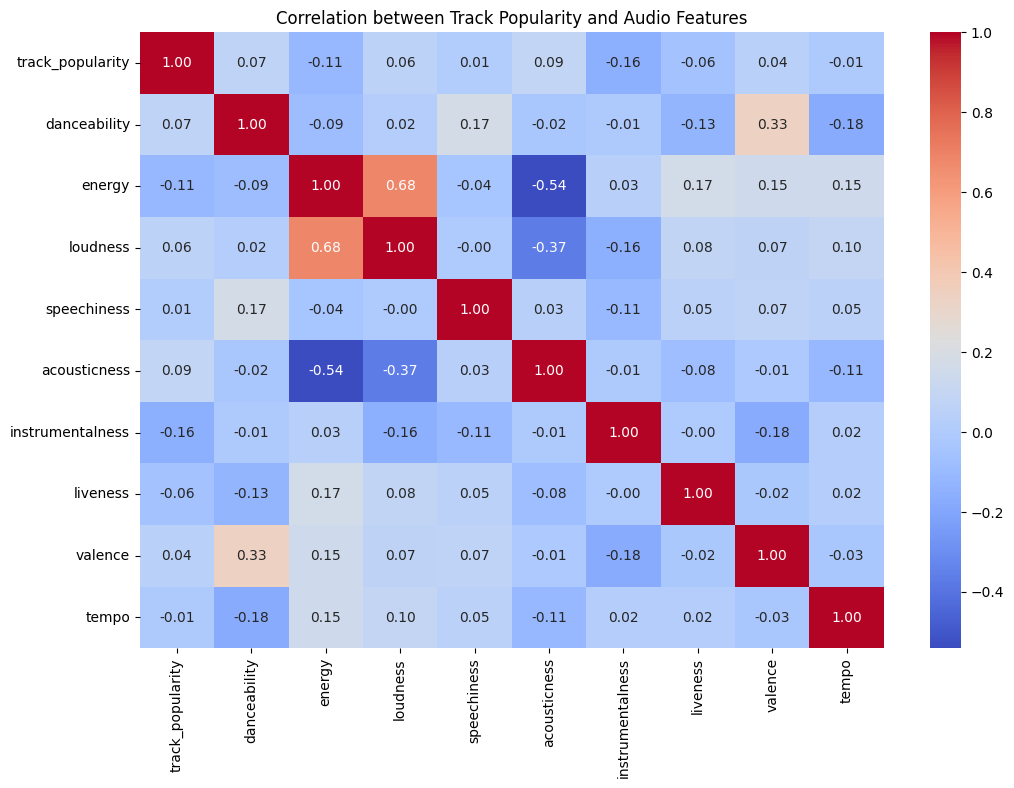

In [18]:
# Selecting the columns of interest
columns_of_interest = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculating the correlation matrix
correlation_matrix = df_cleaned[columns_of_interest].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Track Popularity and Audio Features')
plt.show()

The heatmap shows a correlation matrix indicating the relationship between track popularity and various audio features.
Most audio features have very low correlation coefficients with track popularity, suggesting there's no strong linear relationship between them.
Instrumentalness shows a slightly negative correlation, indicating that tracks with less instrumental content might be more popular.

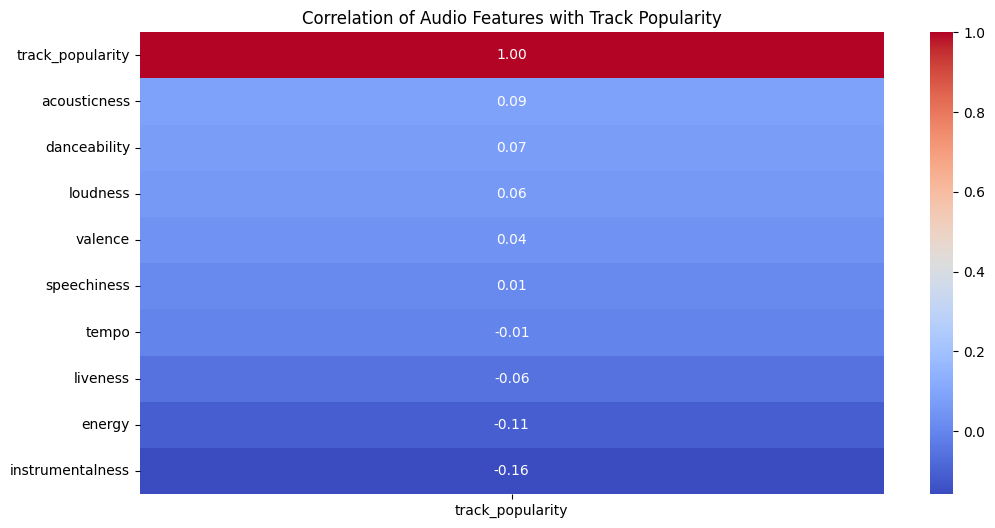

In [19]:
# Using previously calculated correlation matrix that includes track_popularity
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['track_popularity']].sort_values(by='track_popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Audio Features with Track Popularity')
plt.show()

This bar chart highlights the correlation values between track popularity and different audio featuresl, sorting the correlation from most to least. 
Similar to the heatmap, it shows that there's not a strong correlation between most audio features and track popularity.

#### 2. Analyzing Audio Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

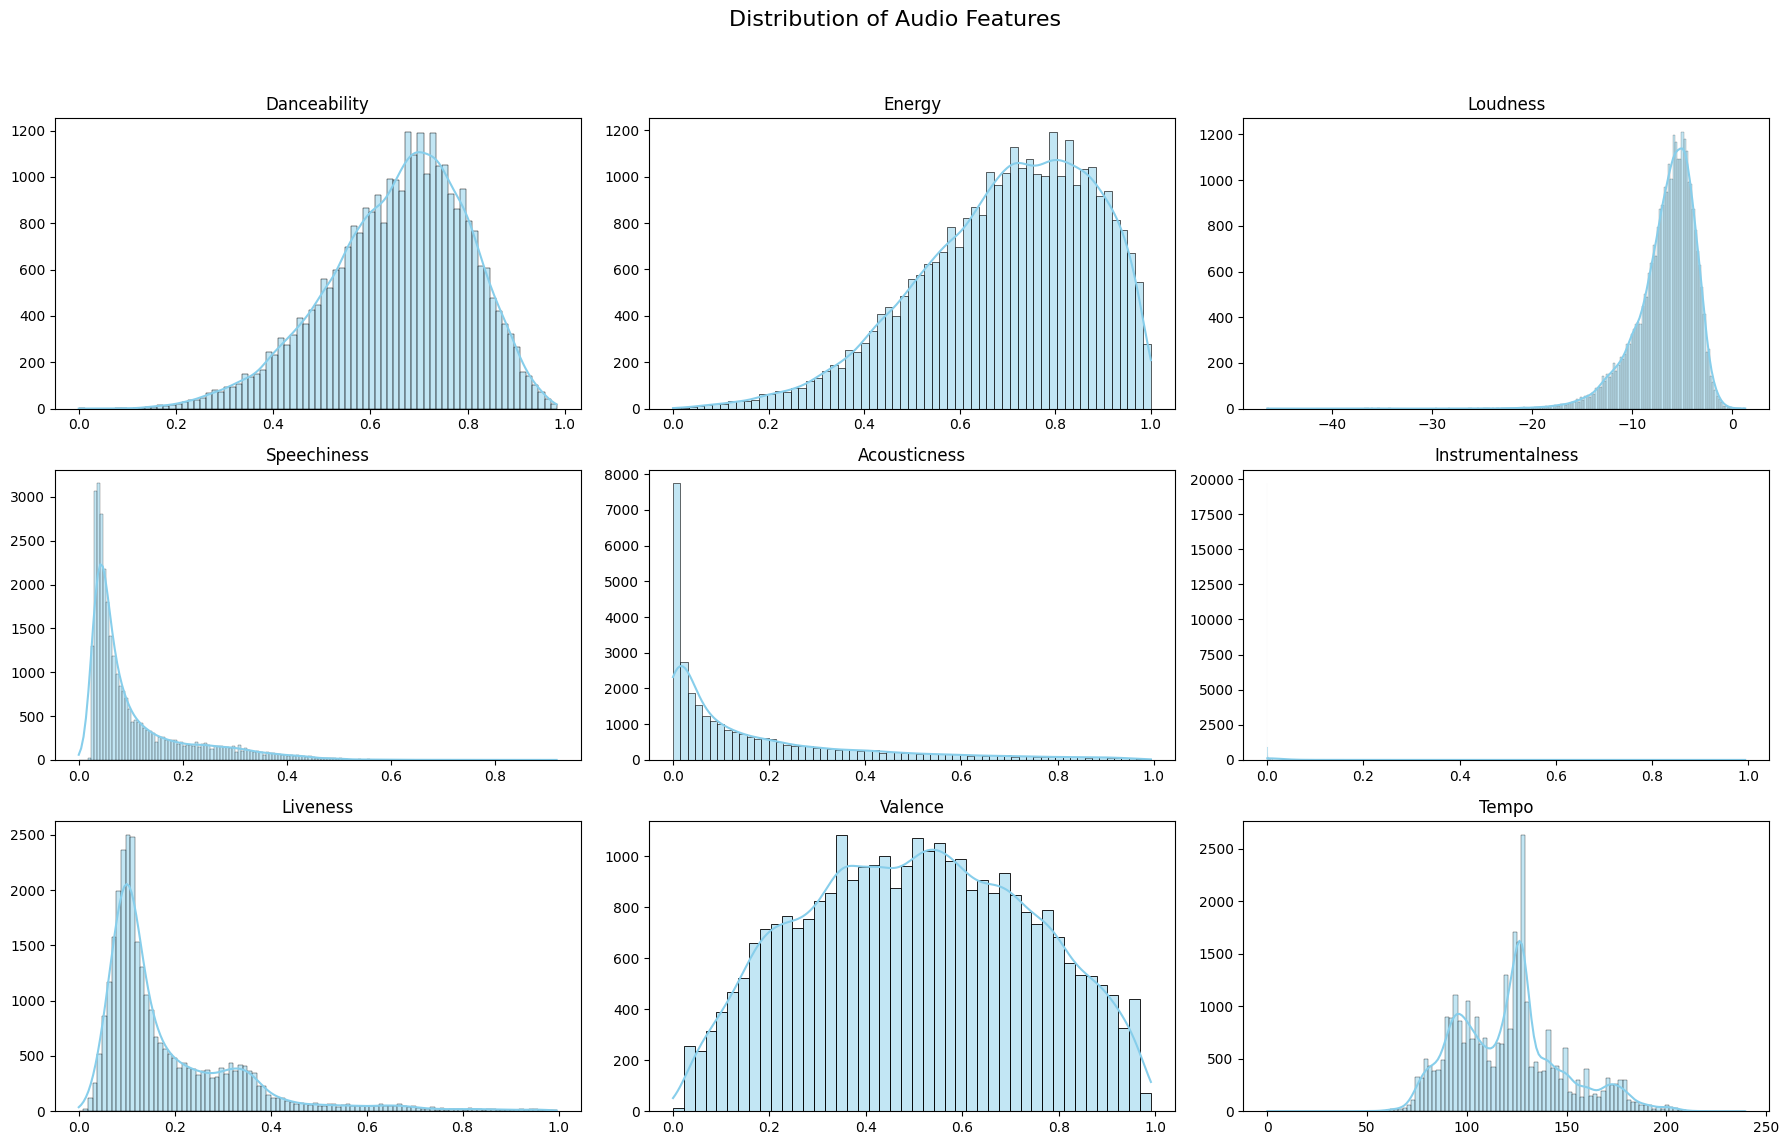

In [20]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plotting distributions of audio features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribution of Audio Features', fontsize=16)

for i, feature in enumerate(audio_features):
    row, col = i // 3, i % 3
    sns.histplot(df_cleaned[feature], ax=axes[row, col], kde=True, color='skyblue')
    axes[row, col].set_title(feature.capitalize())
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The histograms display the distribution of various audio features within the dataset. Features like Danceability, Energy, and Valence seem to follow a somewhat normal distribution, with most values concentrated around a central range.

Acousticness and Instrumentalness skew towards lower values, indicating that most tracks have lower levels of these attributes.

Loudness is left-skewed, showing a concentration of tracks with higher loudness levels, which is typical for produced and mastered tracks.

Speechiness and Liveness have a significant number of tracks with low scores, with a sharp peak at the lower end.

Tempo shows a multi-modal distribution, indicating the presence of tracks with various preferred tempos.

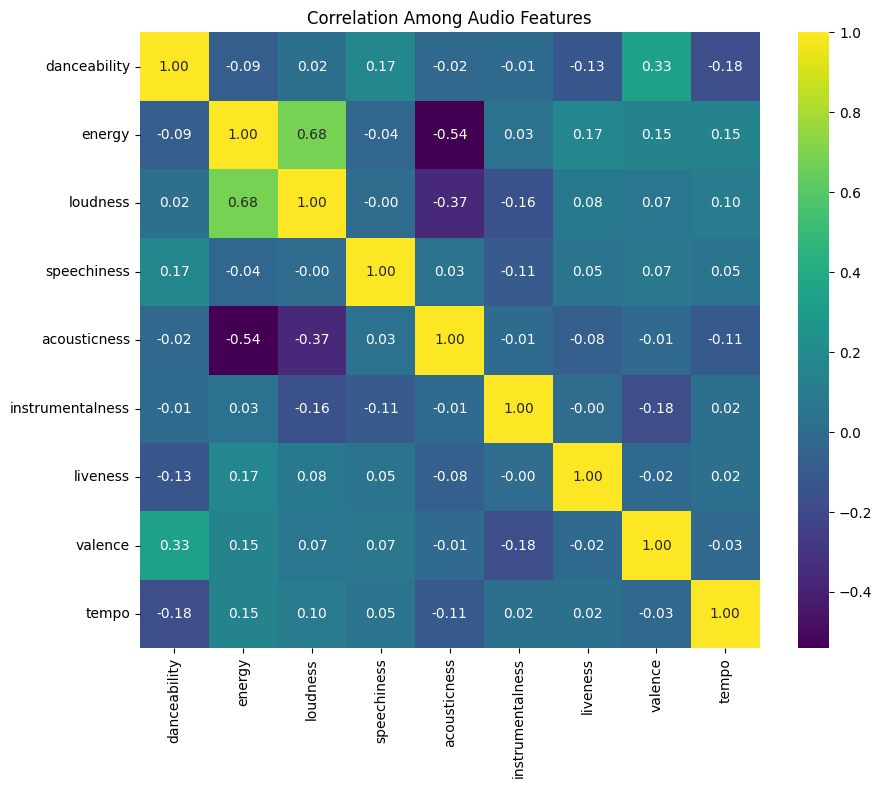

In [21]:
# Calculating the correlation matrix among audio features
corr_matrix_audio = df_cleaned[audio_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_audio, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Among Audio Features')
plt.show()


This heatmap illustrates how different audio features correlate with each other. For instance, Energy and Loudness are positively correlated, as louder tracks are often perceived as more energetic.

Danceability and Valence show a moderate positive correlation, suggesting that tracks that are more danceable tend to be perceived as happier.

There are negative correlations between Acousticness and Energy and between Acousticness and Loudness, meaning tracks with a more acoustic nature are generally quieter and less energetic.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


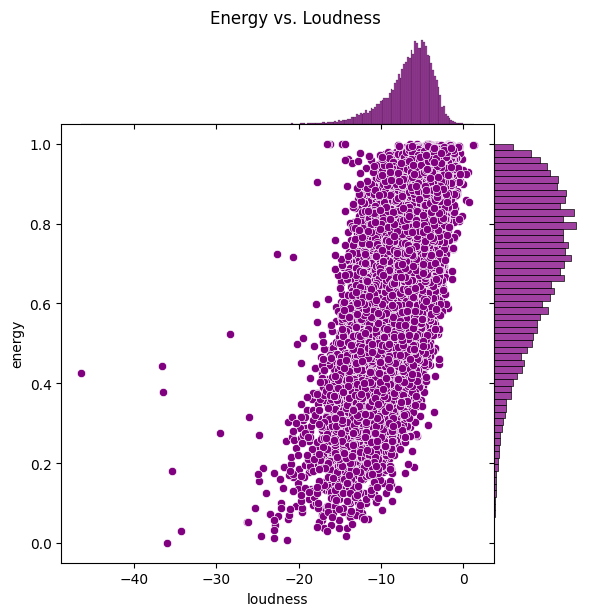

In [22]:
#Futher examination of danceability & valence 
sns.jointplot(x='loudness', y='energy', data=df_cleaned, kind='scatter', color='purple', space=0)
plt.suptitle('Energy vs. Loudness', y=1.02)
plt.show()

This scatter plot indicates a strong positive correlation between Energy and Loudness, consistent with the heatmap. As loudness increases, the energy level of the tracks also tends to increase.

The distribution on the sides suggests that most tracks have a high level of energy and loudness, which is typical for contemporary popular music.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


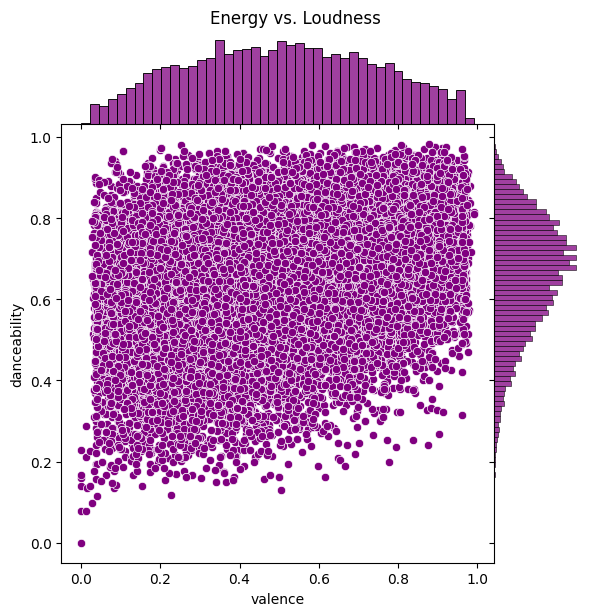

In [23]:
#Futher examination of danceability & valence 
sns.jointplot(x='valence', y='danceability', data=df_cleaned, kind='scatter', color='purple', space=0)
plt.suptitle('Energy vs. Loudness', y=1.02)
plt.show()

The scatter plot for Danceability versus Valence shows a fairly dispersed spread of data points, suggesting a variety of combinations of danceability and valence across tracks.

The distributions on the top and right indicate a wide range of valence but a more concentrated range of danceability, primarily in the middle to high region.

#### 3. Analyzing Genre and Subgenre Diversity

playlist_genre
edm      5969
rap      5468
pop      5303
r&b      5094
latin    4961
rock     4147
Name: count, dtype: int64


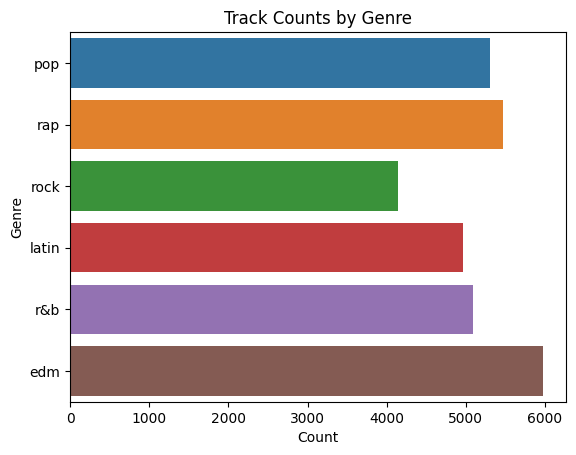

In [24]:
# Count of tracks per genre
genre_counts = df_cleaned['playlist_genre'].value_counts()
print(genre_counts)

# Visualization
sns.countplot(data=df_cleaned, y='playlist_genre')
plt.title('Track Counts by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


The bar chart shows the distribution of tracks across different genres.

Pop and EDM genres have the highest count of tracks, followed by R&B and Latin, with Rock and Rap showing slightly fewer tracks. This suggests that the dataset may have a higher representation of Pop and EDM tracks.

playlist_subgenre
progressive electro house    1760
indie poptimism              1647
latin hip hop                1572
neo soul                     1547
southern hip hop             1512
pop edm                      1507
electro house                1502
gangster rap                 1352
urban contemporary           1337
electropop                   1325
hip hop                      1313
trap                         1291
hard rock                    1282
tropical                     1274
dance pop                    1265
hip pop                      1225
big room                     1200
latin pop                    1190
post-teen pop                1066
classic rock                 1012
new jack swing                985
permanent wave                943
reggaeton                     925
album rock                    910
Name: count, dtype: int64


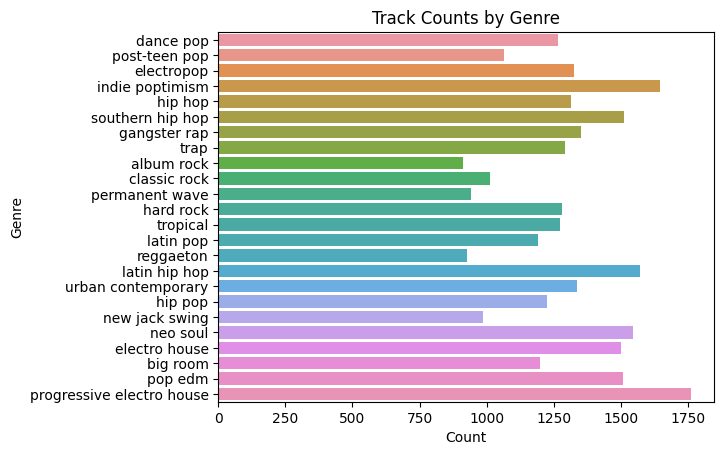

In [25]:
# Overview of subgenre distribution
subgenre_count = df_cleaned['playlist_subgenre'].value_counts()
print(subgenre_count)

# Visualization
sns.countplot(data=df_cleaned, y='playlist_subgenre')
plt.title('Track Counts by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

The distribution of tracks across various subgenres shows more granularity.

Dance Pop, Post-Teen Pop, and Electropop are among the subgenres with the highest track counts, while genres like Pop EDM and Progressive Electro House have the fewest. This diversity reflects a wide range of musical styles and tastes catered to within the dataset.

In [26]:
# Calculating genre diversity in playlists
genre_diversity = df_cleaned.groupby('playlist_id')['playlist_genre'].nunique()

# Calculating subgenre diversity in playlists
subgenre_diversity = df_cleaned.groupby('playlist_id')['playlist_subgenre'].nunique()

# Summary statistics for diversity
print("Genre Diversity within Playlists:\n", genre_diversity.describe())
print("\nSubgenre Diversity within Playlists:\n", subgenre_diversity.describe())


Genre Diversity within Playlists:
 count    471.000000
mean       1.010616
std        0.102593
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: playlist_genre, dtype: float64

Subgenre Diversity within Playlists:
 count    471.000000
mean       1.019108
std        0.151784
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: playlist_subgenre, dtype: float64


The statistical summaries for genre and subgenre diversity indicate that most playlists consist predominantly of one genre or subgenre. The mean close to 1 suggests low diversity in playlists.

The maximum values show that some playlists do include up to 2 different genres and up to 3 different subgenres, but these are less common.


                        average_popularity  genre_diversity  \
playlist_id                                                   
0275i1VNfBnsNbPl0QIBpG           25.489130                1   
03qQtbNHoJuFezRu2CnLuF           66.000000                1   
03sDEv7FN58Mb9CJOs1Tgn           57.045455                1   
06zrBJ5cts5aemZmqe80J7           37.586957                1   
07SNJ4MwYba9wwmzrbjmYi           24.515464                1   

                        subgenre_diversity  
playlist_id                                 
0275i1VNfBnsNbPl0QIBpG                   1  
03qQtbNHoJuFezRu2CnLuF                   1  
03sDEv7FN58Mb9CJOs1Tgn                   1  
06zrBJ5cts5aemZmqe80J7                   1  
07SNJ4MwYba9wwmzrbjmYi                   1  


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


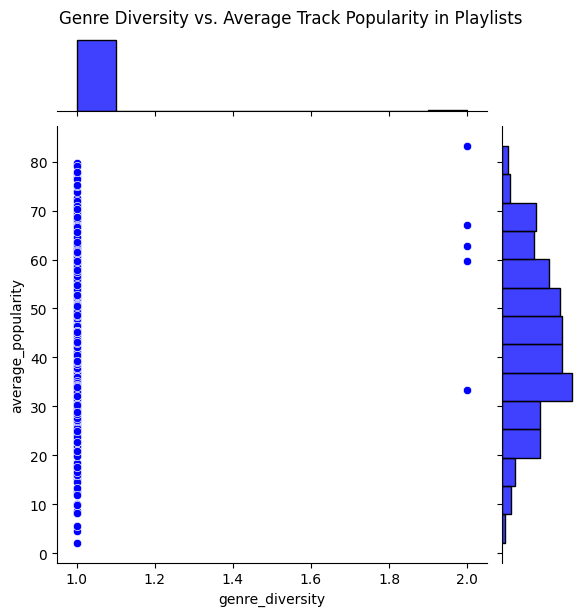

In [27]:
# Merging track popularity with genre diversity
playlist_summary = df_cleaned.groupby('playlist_id').agg({'track_popularity':'mean', 
                                                   'playlist_genre': lambda x: x.nunique(), 
                                                   'playlist_subgenre': lambda x: x.nunique()}).rename(columns={'playlist_genre': 'genre_diversity', 'playlist_subgenre': 'subgenre_diversity', 'track_popularity': 'average_popularity'})

print(playlist_summary.head())

# Visualizing the relationship between genre diversity and average track popularity
sns.jointplot(x='genre_diversity', y='average_popularity', data=playlist_summary, kind='scatter', color='blue')
plt.suptitle('Genre Diversity vs. Average Track Popularity in Playlists', y=1.02)
plt.show()

The scatter plot juxtaposed with a box plot indicates that playlists with a single genre dominate the dataset and have a wide range of average popularity scores.

The presence of some points at higher genre diversity (up to 2) suggests that a few playlists include more than one genre, but this does not seem to have a clear correlation with average track popularity.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


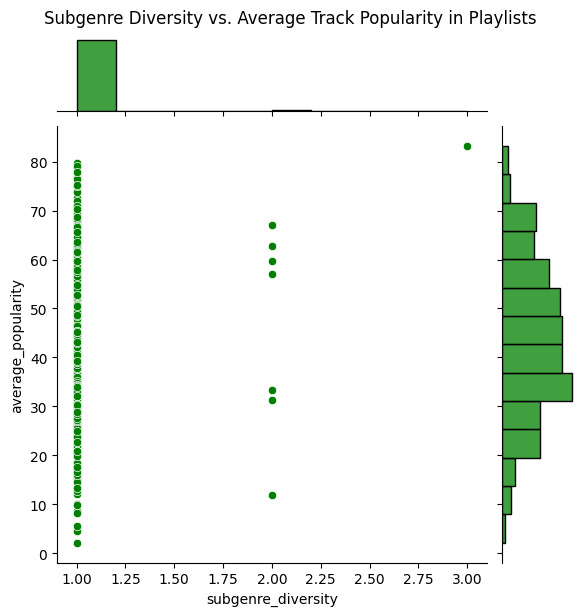

In [28]:
# Visualizing the relationship between subgenre diversity and average track popularity
sns.jointplot(x='subgenre_diversity', y='average_popularity', data=playlist_summary, kind='scatter', color='green')
plt.suptitle('Subgenre Diversity vs. Average Track Popularity in Playlists', y=1.02)
plt.show()

Similar to genre diversity, subgenre diversity is generally low, with most playlists sticking to one subgenre.

Some playlists with higher subgenre diversity (up to 3) are present, and the plot shows no obvious correlation between subgenre diversity and average track popularity, suggesting that having a wider variety of subgenres in a playlist does not necessarily lead to higher popularity.

### Final Insights ###

The prevalence of Pop and EDM genres indicates a significant audience for these styles on Spotify, and curating playlists that lean into these genres might initially seem like a promising strategy to engage a broad listener base.

The uniformity in average track popularity across different genres suggests that listeners do not prefer a specific genre overall. Instead, they might be looking for unique qualities within tracks, regardless of genre, which can be gleaned from audio features.

A variety of musical characteristics within tracks indicates opportunities for personalization beyond genre labels, suggesting that playlists curated by mood or energy levels could resonate more with listeners.

Given that higher genre diversity in playlists does not equate to higher popularity, Spotify might consider creating playlists that focus on depth within genres rather than breadth across multiple genres.

The insights from audio features can help in crafting playlists that align with popular audio profiles, which could potentially appeal to the tastes of a larger segment of listeners.

The EDA suggests that Spotify's strategy could benefit from focusing on the curation of genre-specific playlists enriched with tracks sharing popular audio features. This could lead to more personalized and engaging playlists, thereby potentially increasing user retention.

Moving forward, Spotify could employ machine learning models to further investigate the nuances of listener preferences and predict future trends, although additional user-specific data would be needed to tackle questions regarding churn and demographic preferences directly.